Author: Pavan Kumar Bondalapati<br>
Email: pb7ak@virginia.edu<br>
Class: DS 5001<br>
Date: May 11, 2021<br>

In [1]:
# Code is adapted from Raf Alvarado
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

In [2]:
sns.set()

In [3]:
OHCO = ['book_num', 'fable_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
FABLES = OHCO[:2]
BOOKS = OHCO[:1]
BAG = PARAS

In [4]:
salex_csv = 'data_in/lexicons/salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [5]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]
salex['polarity'] = salex.positive - salex.negative
salex

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [6]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [7]:
TOKENS = pd.read_csv('data_out/TOKEN.csv').set_index(OHCO).sort_index()
LIB = pd.read_csv('data_out/LIB.csv').set_index('book_num').sort_index()

In [8]:
TOKENS

pos_tuple  pos  \
book_num fable_num para_num sent_num token_num                            
1        1         0        0        0              ('God', 'NNP')  NNP   
                                     1          ('reduces', 'VBZ')  VBZ   
                                     2            ('Chaos', 'NNP')  NNP   
                                     3              ('into', 'IN')   IN   
                                     4             ('order', 'NN')   NN   
...                                                            ...  ...   
15       5         21       9        19               ('at', 'IN')   IN   
                                     20             ('what', 'WP')   WP   
                                     21             ('time', 'NN')   NN   
                   22       0        0               ('THE', 'DT')   DT   
                                     1               ('END', 'NN')   NN   

                                               token_str term_str  
book_num fable_num para_num sent_num token_num                     
1        1         0        0        0               God      god  
                                     1           reduces  reduces  
                                     2             Chaos    chaos  
                                     3              into     into  
                                     4             order    order  
...                                                  ...      ...  
15       5         21       9        19               at       at  
                                     20             what     what  
                                     21             time     time  
                   22       0        0               THE      the  
                                     1               END      end  

[276849 rows x 4 columns]

In [9]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [10]:
narrs = ['The Divine Comedy', 
         'The Avenging Gods', 
         'The Pathos of Love', 
         'Rome and the Deified Ruler']
counts = [2-1+1, 6-3+1, 11-7+1, 15-12+1]
narratives = [n for n, c in zip(narrs, counts) for i in range(c)]
LIB['narrative'] = narratives

In [11]:
TOKENS = TOKENS.fillna(0).join(LIB[['narrative']], on='book_num')
DC = TOKENS[TOKENS.narrative == 'The Divine Comedy']
AG = TOKENS[TOKENS.narrative == 'The Avenging Gods']
PL = TOKENS[TOKENS.narrative == 'The Pathos of Love']
DR = TOKENS[TOKENS.narrative == 'Rome and the Deified Ruler']

<AxesSubplot:>

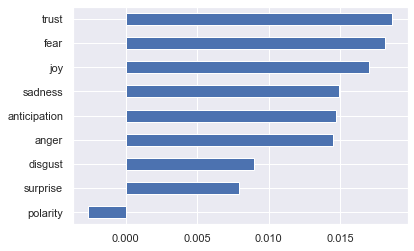

In [12]:
DC[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

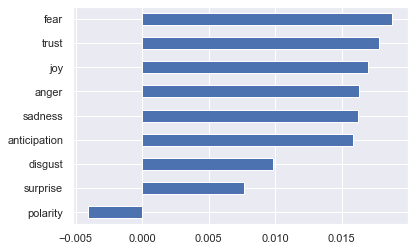

In [13]:
AG[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

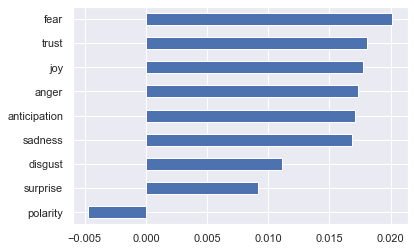

In [14]:
PL[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

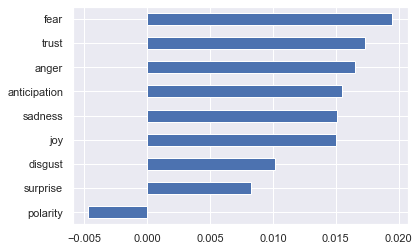

In [15]:
DR[emo_cols].mean().sort_values().plot.barh()

In [16]:
DC = DC.groupby(FABLES)[emo_cols].mean()
AG = AG.groupby(FABLES)[emo_cols].mean()
PL = PL.groupby(FABLES)[emo_cols].mean()
DR = DR.groupby(FABLES)[emo_cols].mean()

In [17]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

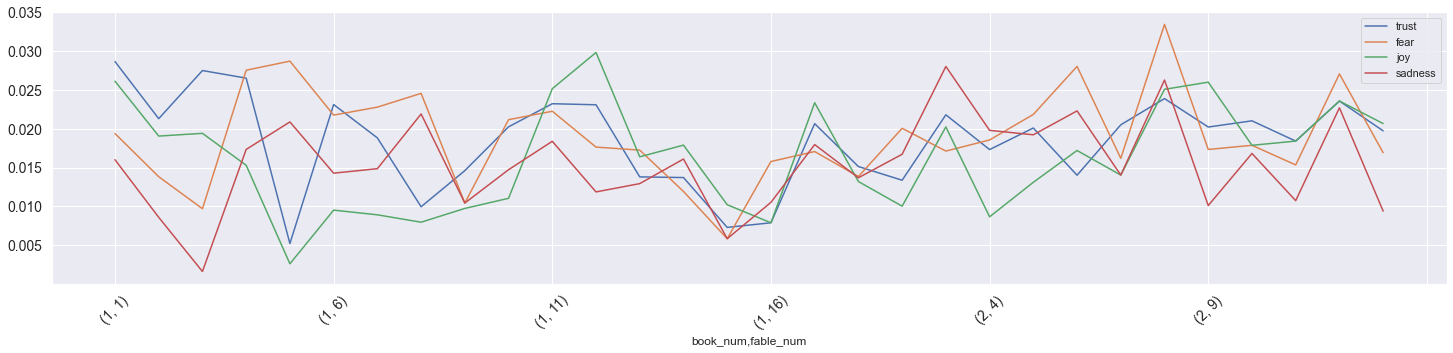

In [18]:
plot_sentiments(DC, ['trust','fear','joy','sadness'])

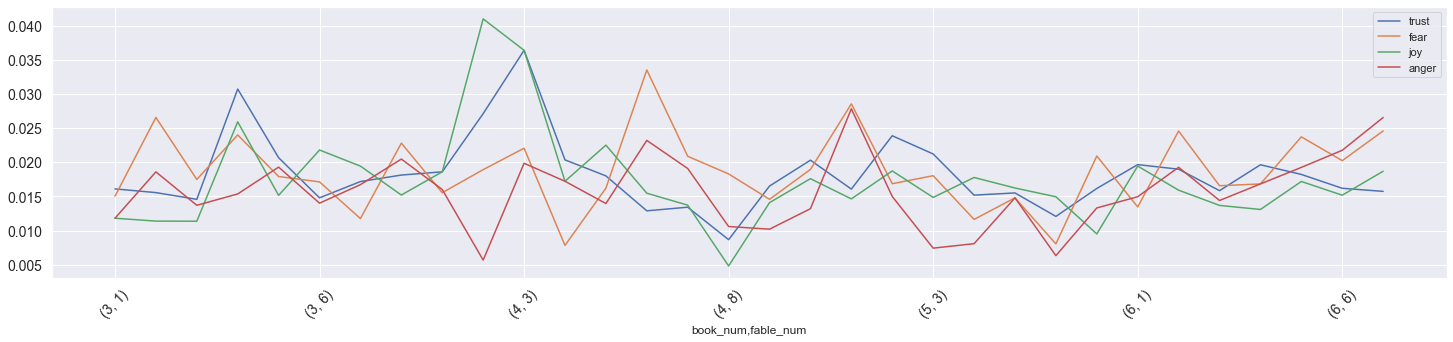

In [19]:
plot_sentiments(AG, ['trust','fear','joy','anger'])

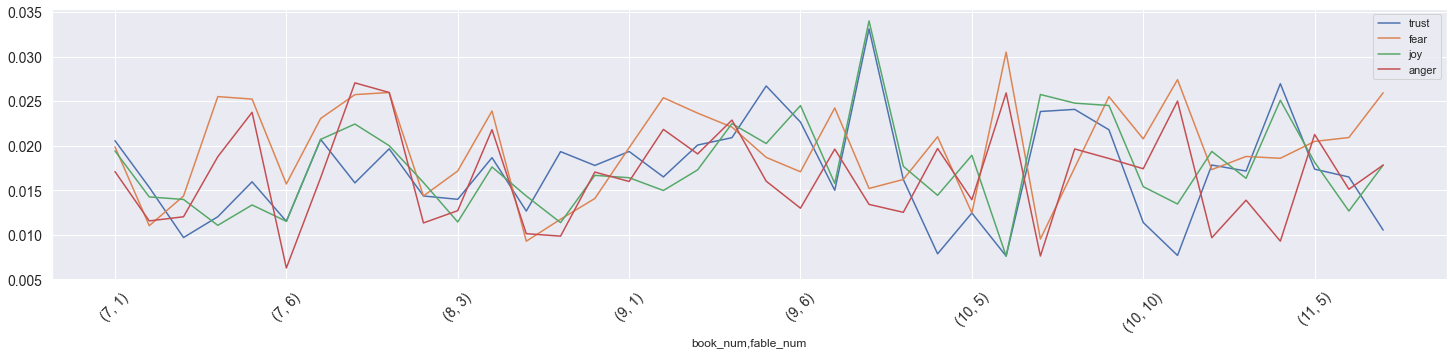

In [20]:
plot_sentiments(PL, ['trust','fear','joy','anger'])

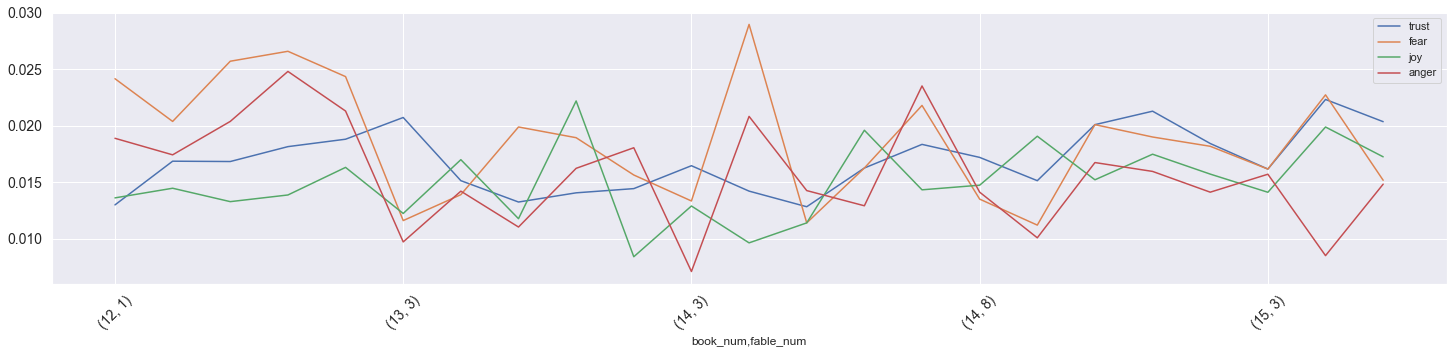

In [21]:
plot_sentiments(DR, ['trust','fear','joy','anger'])